<font color=blue size=7>**Analisando dados de impedância elétrica**</font>

*by Anna Laura Yuri Yokomichi*

***

Neste projeto será analisado os dados obtidos das medidas de impedância elétrica de biossensores em resposta a presença do anticorpo anti-beta-amilóide. O estudo foi desenvolvido como projeto de mestrado da Anna Laura no Laboratório de Biossensores e Biosistemas da Universidade Federal de São Paulo - UNIFESP, São José dos Campos.


# 1 Introdução
Biossensores são dispositivos capazes de reconhecer determinada substância por meio de uma biomolécula. Dois exemplos de biossensores são os testes de gravidez e as tiras para medir o nível de glicose.

A interação entre a molécula de interesse e a biomolécula gera uma alteração no sistema e um transdutor converte esta resposta em um sinal, que pode ser um sinal elétrico, que será processado por um software e expresso por parâmetros físicos que descrevem os efeitos envolvidos.

No estudo desenvolvido foi utilizado um transdutor eletroquímico, mais especificamente a técnica de espectroscopia de impedância elétrica, onde um potencial elétrico alternado é aplicado sobre o sistema e é observado alterações na impedância como resposta.

Quatro sistemas foram estudados:

* Especificos (contém a biomolécula sobre uma matriz de imobilização):
 - SF/BA42
 - SFeBA42
* Controles:
 - SF (apenas matriz de imobilização)
 - SF/p24-3 (biomolécula que não reconhece o anticorpo sobre a mesma matriz de imobilização)


# 2 Objetivo
Explorar os dados e determinar se os sistemas específicos possuem resposta elétrica diferente dos sistemas controles, sugerindo que o sinal análisado é referente ao reconhecimento do anticorpo pela biomolécula e não pela interação com a matriz de imobilização.

# 3 Metodologia
Após a adição do anticorpo nos sistemas controles e específicos foi mensurado a impedância em relação ao potencial aplicado numa faixa de frequência de 1 Hz a 1 MHz.

>>Sendo a impedância <font size=4, >$Z$ =  $Z'$ + j $Z''$ </font>

>>><font size =2>$Z'$ = impedância real <br>
>>>$Z''$ = impedância imaginária ($Z''$) </font>

As concentrações do anticorpo utilizadas em cada sistema foram 0 - 0.5 - 1 - 5 - 7.5 - 10 $\mu g/mL$

A partir dos dados coletados foram feitas análises através do Google Collab utilizando a linguagem Python.

As bibliotecas Pandas, Numpay, Matplotlib, Seaborn foram usadas para confecção de gráficos, análises e manipulação dos dados.<br> Para a criação desenvolvimento dos modelos de Machine Learning foi utilizado a biblioteca Sckit-Learn.

# 4 Análises

## 4.1 Importando bibliotecas

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## 4.2 Leitura dos arquivos e montagem dos DataFrames

In [2]:
# Leitura de um arquivo
X = pd.read_csv('SF_0ng.csv', sep=',')
X.head()

,Frequency (Hz),Impedance Real (Ohms),Impedance Imaginary (Ohms),Impedance Magnitude (Ohms)
0,1000000.0,88.24123,11.092040,88.93564
1,630957.3,88.49437,5.494747,88.66479
2,398107.2,88.97404,1.069733,88.98048
3,251188.6,89.68707,-2.671633,89.72685
4,158489.3,90.92319,-6.293442,91.14074


Cada arquivo contem a resposta de um sistema em relação a uma determinada concentração do anticorpo, sendo mensurada a impedância real ($Z'$), impedância imaginária ($Z"$) e a magnitude da impedância ($Z$) em relação a frequência aplicada.


Para facilitar a análise dos dados, decidiu-se montar dataframes de apenas um parâmetro ($Z'$, $Z"$, ou $Z$), agrupando os dados de todos os sistemas (SF, SF/p24-3, SF/BA42 e SFeBA42) com as diferentes concentrações do anticorpo (0 - 0.5 - 1 - 5 - 7.5 - 10 $\mu g/mL$). Para cada arquivo lido, cada coluna foi adicionada à respectiva lista e posteriormente transformadas em dataframes.

In [3]:
concentracao = [0, 500, 1000, 5000, 7500, 10000]
sistemas = ['SF', 'SF_p24-3', 'SF_BA42', 'SFeBA42']
Z1 = []      # lista para armazenar os dados de impedância real
Z2 = []      # lista para armazenar os dados de impedância imaginaria
Z = []       # lista para armazenar os dados da magnitude da impedância
D = []       # lista para armazenar a concentracao e o sistema

# Leitura e coleta de dados dos arquivos
for s in sistemas:
  for c in concentracao:
    arq = pd.read_csv(f'{s}_{c}ng.csv', sep=',')
    arq.set_index('Frequency (Hz)', inplace=True)
    IR = arq['Impedance Real (Ohms)']
    II = arq['Impedance Imaginary (Ohms)']
    IM = arq['Impedance Magnitude (Ohms)']
    D.append([c/1000, s])       # armazenando concentracao e sistema
    Z1.append(IR)               # armazenando dados lidos
    Z2.append(II)
    Z.append(IM)


In [4]:
# Transformando dados coletados em dataframe
Z1 = pd.DataFrame(Z1)      # dataframe com os dados de Impedância Real
Z2 = pd.DataFrame(Z2)      # dataframe com os dados de Impedância Imaginaria
Z = pd.DataFrame(Z)        # dataframe com os dados da Magnitude da Impedância
D = pd.DataFrame(D, columns=['Concentration', 'System'])

# Realizando ajustes nos dataframes
Z1.reset_index(inplace=True)                # alterando index para números
Z1.drop(columns = ['index'], inplace=True)  # excluindo coluna indesejada
Z1 = pd.concat([Z1, D], axis=1)             # adicionando concentracao e sistema para o dataframe
Z2.reset_index(inplace=True)
Z2.drop(columns = ['index'], inplace=True)
Z2 = pd.concat([Z2, D], axis=1)   
Z.reset_index(inplace=True)
Z.drop(columns = ['index'], inplace=True)
Z = pd.concat([Z, D], axis=1)   

# Visualizando dados de um dos dataframes gerados
Z1.head(7)

,1000000.0,630957.3,398107.2,251188.6,158489.3,100000.0,63095.73,39810.72,25118.86,15848.93,10000.0,6309.573,3981.072,2511.886,1584.8929999999998,1000.0,630.9573,398.1071,251.1886,158.4893,100.0,63.09574,39.81072,25.11887,15.84893,10.0,6.309573,3.981072,2.511886,1.584893,1.0,Concentration,System
0,88.24123,88.49437,88.97404,89.68707,90.92319,92.49662,94.29631,96.04481,97.70567,99.52490,102.15900,106.01700,111.81740,120.96940,135.1171,156.7917,190.2595,244.6430,330.5361,474.0657,706.1536,1083.0500,1697.840,2702.748,4342.588,7031.496,11471.970,18743.67,30532.22,50125.45,91283.67,0.0,SF
1,88.14780,88.38666,88.80903,89.46890,90.62466,92.16438,94.00378,95.75499,97.42886,99.27890,101.82000,105.51290,110.96570,119.53470,133.2220,154.3553,186.7422,238.3375,319.8214,453.9505,672.3438,1023.5880,1610.473,2561.150,4113.473,6662.040,10834.860,17598.27,28976.36,47034.13,83732.85,0.5,SF
2,88.36790,88.57944,88.98732,89.61607,90.76421,92.30623,94.06610,95.78183,97.44709,99.36567,101.80200,105.32630,110.64320,118.83980,132.0660,152.5492,184.8106,235.9887,316.0666,446.3308,659.6589,1007.1450,1578.000,2508.200,4035.464,6545.804,10686.450,17529.03,28849.47,47361.07,84066.02,1.0,SF
3,88.28231,88.49156,88.88543,89.48293,90.58624,92.09593,93.78703,95.65636,97.30653,99.11120,101.58980,104.94920,110.15520,118.32710,131.1130,150.9918,181.4263,229.3339,303.1880,425.9810,621.3042,944.9435,1460.113,2304.209,3684.794,5949.973,9660.021,15818.72,26022.54,42275.84,78184.24,5.0,SF
4,88.16724,88.36272,88.74191,89.32972,90.41660,91.90254,93.63160,95.52502,97.18924,98.96346,101.45340,104.79420,109.89830,117.95290,130.4875,149.9210,179.4391,225.0768,294.6241,409.7381,592.3914,887.9810,1365.374,2145.021,3416.043,5488.260,8885.447,14502.76,23790.69,38972.90,70975.48,7.5,SF
5,88.18372,88.37984,88.74393,89.29467,90.32887,91.78825,93.56403,95.43053,97.09140,98.84142,101.30470,104.71060,109.79280,117.75480,130.2010,149.3017,178.1322,222.3283,289.3035,399.3030,575.3848,853.4495,1308.377,2049.991,3252.370,5227.085,8457.233,13818.27,22712.18,37158.11,68826.88,10.0,SF
6,56.22485,55.28388,55.30559,55.90836,56.97483,58.06866,59.14645,60.23222,61.54566,63.25719,66.07764,70.51594,77.20306,87.92537,105.1046,132.2637,175.1533,244.4515,353.1795,534.2839,826.3504,1312.0270,2098.493,3391.559,5498.662,8970.992,14681.370,24126.39,40002.72,65658.93,117386.30,0.0,SF_p24-3


## 4.3 Análise Exploratória


### 4.3.1 Valores de impedâcia e concentração do anticorpo

Uma maneira de compreendermos melhor os dados seria verificando o que ocorre com os valores de Impedância em todo espectro quando aumentamos a concentração do anticorpo nos sistemas

#### 4.3.1.1 Impedância real ($Z'$)

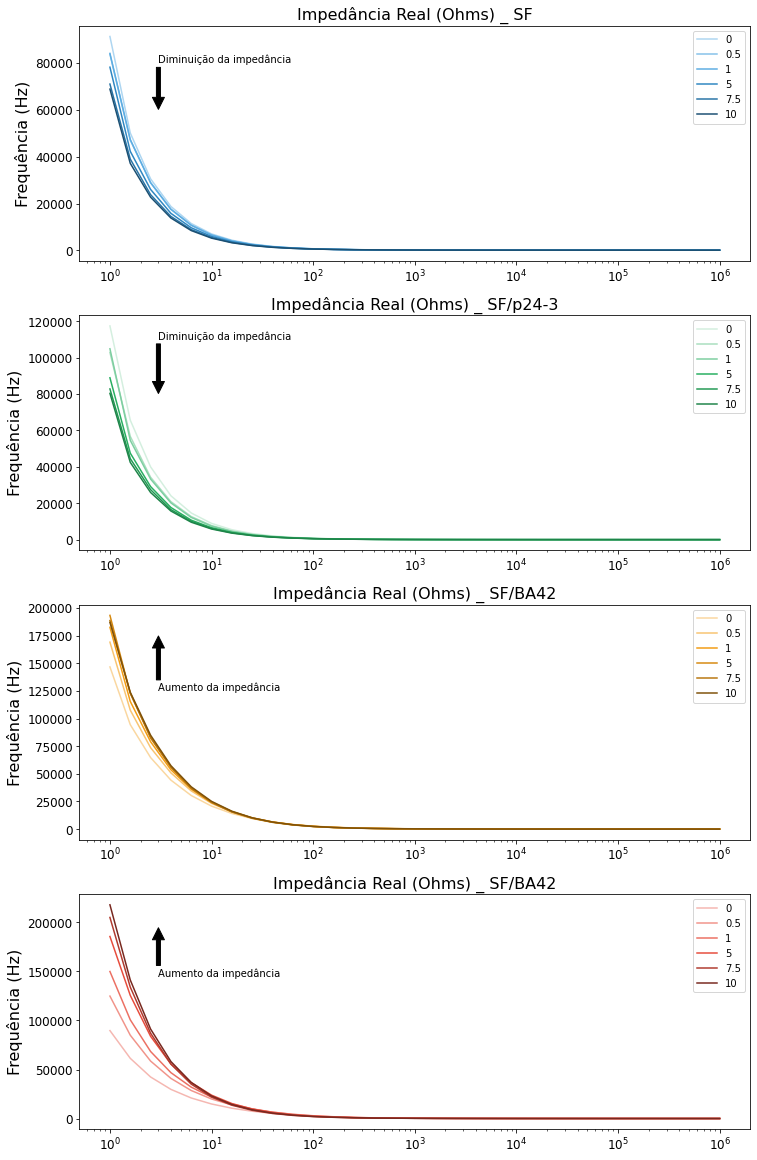

In [21]:
fig = plt.figure(figsize = (20, 16), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)

# Grafico do sistema SF
f_ax1 = fig.add_subplot(spec[0, 0])
f_ax1.set_title('Impedância Real (Ohms) _ SF', fontsize= 16)
f_ax1.set_ylabel('Frequência (Hz)', fontsize=16)
f_ax1.plot(Z1.iloc[0, :-2], color='#AED6F1', label ="0")
f_ax1.plot(Z1.iloc[1, :-2], color='#85C1E9', label ="0.5")
f_ax1.plot(Z1.iloc[2, :-2], color='#5DADE2', label ="1")
f_ax1.plot(Z1.iloc[3, :-2], color='#2E86C1', label ="5")
f_ax1.plot(Z1.iloc[4, :-2], color='#2874A6', label ="7.5")
f_ax1.plot(Z1.iloc[5, :-2], color='#1B4F72', label ="10")
f_ax1.legend()
f_ax1.tick_params(labelsize=12)
f_ax1.annotate('Diminuição da impedância', xy=(3, 60000), xytext= (3, 80000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
#f_ax1.set_ylim(0, 2500000)
plt.xscale('log')

# Grafico do sistema SF/p24-3
f_ax2 = fig.add_subplot(spec[1, 0])
f_ax2.set_title('Impedância Real (Ohms) _ SF/p24-3', fontsize= 16)
f_ax2.set_ylabel('Frequência (Hz)', fontsize=16)
f_ax2.plot(Z1.iloc[6, :-2], color='#D4EFDF', label ="0")
f_ax2.plot(Z1.iloc[7, :-2], color='#A9DFBF', label ="0.5")
f_ax2.plot(Z1.iloc[8, :-2], color='#7DCEA0', label ="1")
f_ax2.plot(Z1.iloc[9, :-2], color='#27AE60', label ="5")
f_ax2.plot(Z1.iloc[10, :-2], color='#229954', label ="7.5")
f_ax2.plot(Z1.iloc[11, :-2], color='#1E8449', label ="10")
f_ax2.legend()
f_ax2.tick_params(labelsize=12)
f_ax2.annotate('Diminuição da impedância', xy=(3, 80000), xytext= (3, 110000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
#f_ax2.set_ylim(0, 2500000)
plt.xscale('log')

# Grafico do sistema SFeBA42
f_ax3 = fig.add_subplot(spec[2, 0])
f_ax3.set_title('Impedância Real (Ohms) _ SF/BA42', fontsize= 16)
f_ax3.set_ylabel('Frequência (Hz)', fontsize=16)
f_ax3.plot(Z1.iloc[18, :-2], color='#FAD7A0', label ="0")
f_ax3.plot(Z1.iloc[19, :-2], color='#F8C471', label ="0.5")
f_ax3.plot(Z1.iloc[20, :-2], color='#F39C12', label ="1")
f_ax3.plot(Z1.iloc[21, :-2], color='#D68910', label ="5")
f_ax3.plot(Z1.iloc[22, :-2], color='#B9770E', label ="7.5")
f_ax3.plot(Z1.iloc[23, :-2], color='#7E5109', label ="10")
f_ax3.legend()
f_ax3.tick_params(labelsize=12)
f_ax3.annotate('Aumento da impedância', xy=(3, 175000), xytext= (3, 125000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
#f_ax3.set_ylim(0, 250000)
plt.xscale('log')

# Grafico do sistema SF/BA42
f_ax4 = fig.add_subplot(spec[3, 0])
f_ax4.set_title('Impedância Real (Ohms) _ SF/BA42', fontsize= 16)
f_ax4.set_ylabel('Frequência (Hz)', fontsize=16)
f_ax4.plot(Z1.iloc[12, :-2], color='#F5B7B1', label ="0")
f_ax4.plot(Z1.iloc[13, :-2], color='#F1948A', label ="0.5")
f_ax4.plot(Z1.iloc[14, :-2], color='#EC7063', label ="1")
f_ax4.plot(Z1.iloc[15, :-2], color='#E74C3C', label ="5")
f_ax4.plot(Z1.iloc[16, :-2], color='#B03A2E', label ="7.5")
f_ax4.plot(Z1.iloc[17, :-2], color='#78281F', label ="10")
f_ax4.legend()
f_ax4.tick_params(labelsize=12)
f_ax4.annotate('Aumento da impedância', xy=(3, 195000), xytext= (3, 145000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
#f_ax4.set_ylim(0, 250000)
plt.xscale('log')

plt.show()

Quando analisamos a Impedância Real ($Z'$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram maiores valores de Impedância Real em frequências baixas.

* Houve uma diminuição dos valores de Impedância Real em baixas frequências com o aumento da concentração do anticorpo para os sistemas controles, enquanto que os sistemas específicos obtiveram comportamento oposto.




#### 4.3.1.2 Impedância Imaginária ($Z"$)

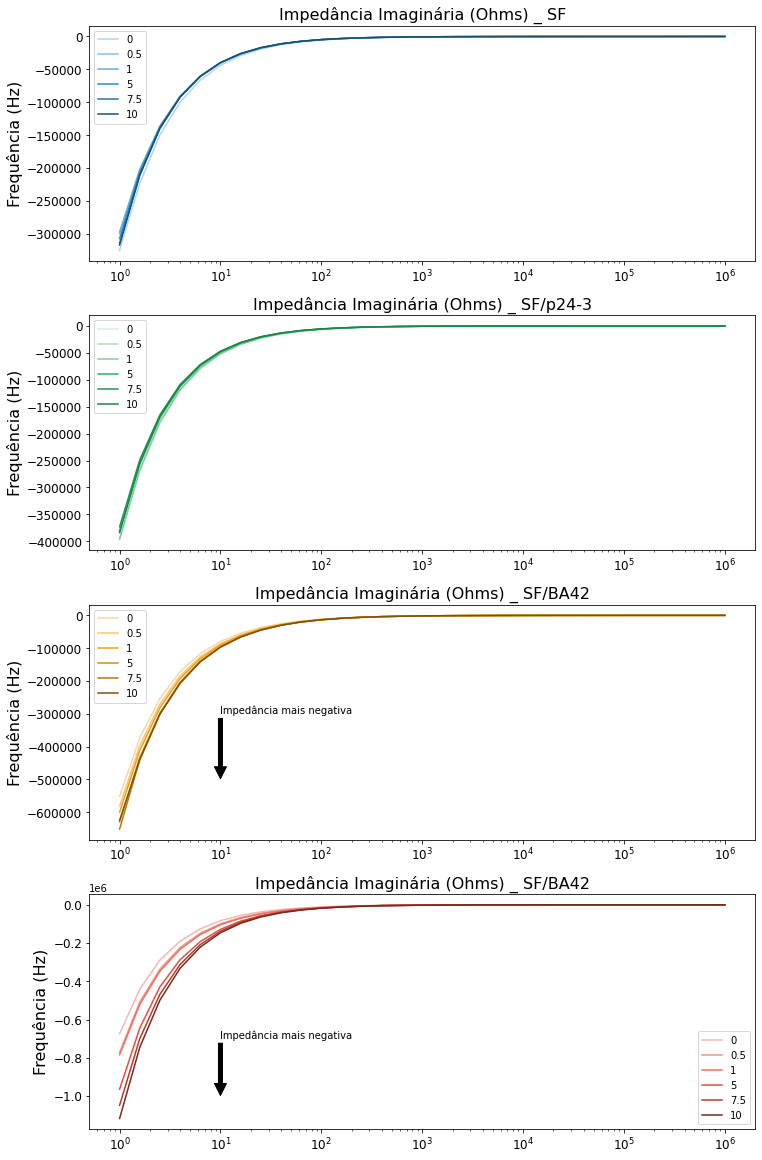

In [31]:
fig2 = plt.figure(figsize = (20, 16), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig2)

# Grafico do sistema SF
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.set_title('Impedância Imaginária (Ohms) _ SF', fontsize= 16)
f2_ax1.set_ylabel('Frequência (Hz)', fontsize=16)
f2_ax1.plot(Z2.iloc[0, :-2], color='#AED6F1', label ="0")
f2_ax1.plot(Z2.iloc[1, :-2], color='#85C1E9', label ="0.5")
f2_ax1.plot(Z2.iloc[2, :-2], color='#5DADE2', label ="1")
f2_ax1.plot(Z2.iloc[3, :-2], color='#2E86C1', label ="5")
f2_ax1.plot(Z2.iloc[4, :-2], color='#2874A6', label ="7.5")
f2_ax1.plot(Z2.iloc[5, :-2], color='#1B4F72', label ="10")
f2_ax1.legend()
f2_ax1.tick_params(labelsize=12)
plt.xscale('log')

# Grafico do sistema SF/p24-3
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax2.set_title('Impedância Imaginária (Ohms) _ SF/p24-3', fontsize= 16)
f2_ax2.set_ylabel('Frequência (Hz)', fontsize=16)
f2_ax2.plot(Z2.iloc[6, :-2], color='#D4EFDF', label ="0")
f2_ax2.plot(Z2.iloc[7, :-2], color='#A9DFBF', label ="0.5")
f2_ax2.plot(Z2.iloc[8, :-2], color='#7DCEA0', label ="1")
f2_ax2.plot(Z2.iloc[9, :-2], color='#27AE60', label ="5")
f2_ax2.plot(Z2.iloc[10, :-2], color='#229954', label ="7.5")
f2_ax2.plot(Z2.iloc[11, :-2], color='#1E8449', label ="10")
f2_ax2.legend()
f2_ax2.tick_params(labelsize=12)
plt.xscale('log')

# Grafico do sistema SFeBA42
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax3.set_title('Impedância Imaginária (Ohms) _ SF/BA42', fontsize= 16)
f2_ax3.set_ylabel('Frequência (Hz)', fontsize=16)
f2_ax3.plot(Z2.iloc[18, :-2], color='#FAD7A0', label ="0")
f2_ax3.plot(Z2.iloc[19, :-2], color='#F8C471', label ="0.5")
f2_ax3.plot(Z2.iloc[20, :-2], color='#F39C12', label ="1")
f2_ax3.plot(Z2.iloc[21, :-2], color='#D68910', label ="5")
f2_ax3.plot(Z2.iloc[22, :-2], color='#B9770E', label ="7.5")
f2_ax3.plot(Z2.iloc[23, :-2], color='#7E5109', label ="10")
f2_ax3.legend()
f2_ax3.tick_params(labelsize=12)
f2_ax3.annotate('Impedância mais negativa', xy=(10, -500000), xytext= (10, -300000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
plt.xscale('log')

# Grafico do sistema SF/BA42
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax4.set_title('Impedância Imaginária (Ohms) _ SF/BA42', fontsize= 16)
f2_ax4.set_ylabel('Frequência (Hz)', fontsize=16)
f2_ax4.plot(Z2.iloc[12, :-2], color='#F5B7B1', label ="0")
f2_ax4.plot(Z2.iloc[13, :-2], color='#F1948A', label ="0.5")
f2_ax4.plot(Z2.iloc[14, :-2], color='#EC7063', label ="1")
f2_ax4.plot(Z2.iloc[15, :-2], color='#E74C3C', label ="5")
f2_ax4.plot(Z2.iloc[16, :-2], color='#B03A2E', label ="7.5")
f2_ax4.plot(Z2.iloc[17, :-2], color='#78281F', label ="10")
f2_ax4.legend()
f2_ax4.tick_params(labelsize=12)
f2_ax4.annotate('Impedância mais negativa', xy=(10, -1000000), xytext= (10, -700000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
plt.xscale('log')

plt.show()

Quando analisamos a Impedância Imaginária ($Z"$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram os menores valores de Impedância Imaginária em frequências baixas.

* Houve variação nos valores de Impedância Imaginária em baixas frequências com o aumento da concentração do anticorpo para os sistemas específicos, enquanto que os sistemas controles não tiveram variação significativa.


#### 4.3.1.3 Magnitude da Impedância ($Z$)

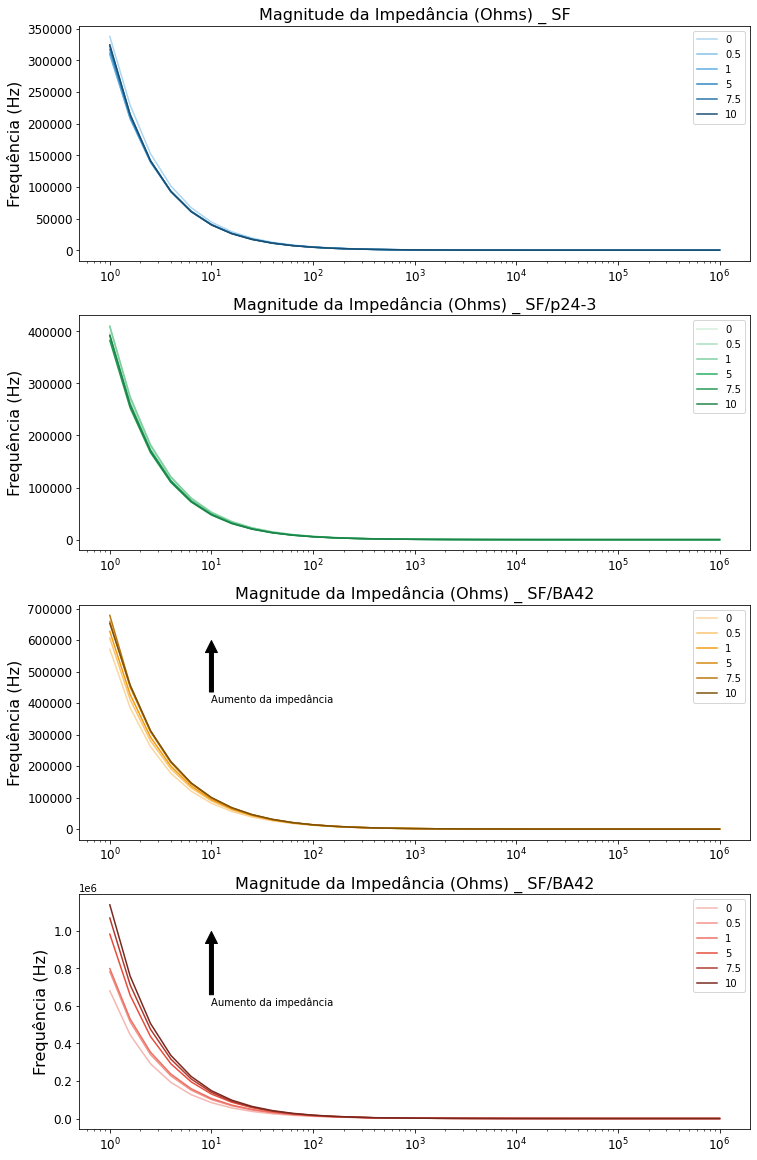

In [36]:
fig3 = plt.figure(figsize = (20, 16), constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig3)

# Grafico do sistema SF
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax1.set_title('Magnitude da Impedância (Ohms) _ SF', fontsize= 16)
f3_ax1.set_ylabel('Frequência (Hz)', fontsize=16)
f3_ax1.plot(Z.iloc[0, :-2], color='#AED6F1', label ="0")
f3_ax1.plot(Z.iloc[1, :-2], color='#85C1E9', label ="0.5")
f3_ax1.plot(Z.iloc[2, :-2], color='#5DADE2', label ="1")
f3_ax1.plot(Z.iloc[3, :-2], color='#2E86C1', label ="5")
f3_ax1.plot(Z.iloc[4, :-2], color='#2874A6', label ="7.5")
f3_ax1.plot(Z.iloc[5, :-2], color='#1B4F72', label ="10")
f3_ax1.legend()
f3_ax1.tick_params(labelsize=12)
plt.xscale('log')

# Grafico do sistema SF/p24-3
f3_ax2 = fig3.add_subplot(spec3[1, 0])
f3_ax2.set_title('Magnitude da Impedância (Ohms) _ SF/p24-3', fontsize= 16)
f3_ax2.set_ylabel('Frequência (Hz)', fontsize=16)
f3_ax2.plot(Z.iloc[6, :-2], color='#D4EFDF', label ="0")
f3_ax2.plot(Z.iloc[7, :-2], color='#A9DFBF', label ="0.5")
f3_ax2.plot(Z.iloc[8, :-2], color='#7DCEA0', label ="1")
f3_ax2.plot(Z.iloc[9, :-2], color='#27AE60', label ="5")
f3_ax2.plot(Z.iloc[10, :-2], color='#229954', label ="7.5")
f3_ax2.plot(Z.iloc[11, :-2], color='#1E8449', label ="10")
f3_ax2.legend()
f3_ax2.tick_params(labelsize=12)
plt.xscale('log')

# Grafico do sistema SFeBA42
f3_ax3 = fig3.add_subplot(spec3[2, 0])
f3_ax3.set_title('Magnitude da Impedância (Ohms) _ SF/BA42', fontsize= 16)
f3_ax3.set_ylabel('Frequência (Hz)', fontsize=16)
f3_ax3.plot(Z.iloc[18, :-2], color='#FAD7A0', label ="0")
f3_ax3.plot(Z.iloc[19, :-2], color='#F8C471', label ="0.5")
f3_ax3.plot(Z.iloc[20, :-2], color='#F39C12', label ="1")
f3_ax3.plot(Z.iloc[21, :-2], color='#D68910', label ="5")
f3_ax3.plot(Z.iloc[22, :-2], color='#B9770E', label ="7.5")
f3_ax3.plot(Z.iloc[23, :-2], color='#7E5109', label ="10")
f3_ax3.legend()
f3_ax3.tick_params(labelsize=12)
f3_ax3.annotate('Aumento da impedância', xy=(10, 600000), xytext= (10, 400000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
plt.xscale('log')

# Grafico do sistema SF/BA42
f3_ax4 = fig3.add_subplot(spec3[3, 0])
f3_ax4.set_title('Magnitude da Impedância (Ohms) _ SF/BA42', fontsize= 16)
f3_ax4.set_ylabel('Frequência (Hz)', fontsize=16)
f3_ax4.plot(Z.iloc[12, :-2], color='#F5B7B1', label ="0")
f3_ax4.plot(Z.iloc[13, :-2], color='#F1948A', label ="0.5")
f3_ax4.plot(Z.iloc[14, :-2], color='#EC7063', label ="1")
f3_ax4.plot(Z.iloc[15, :-2], color='#E74C3C', label ="5")
f3_ax4.plot(Z.iloc[16, :-2], color='#B03A2E', label ="7.5")
f3_ax4.plot(Z.iloc[17, :-2], color='#78281F', label ="10")
f3_ax4.legend()
f3_ax4.tick_params(labelsize=12)
f3_ax4.annotate('Aumento da impedância', xy=(10, 1000000), xytext= (10, 600000), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
plt.xscale('log')

plt.show()

Quando analisamos a Magnitude da Impedância ($Z$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram os menores valores da Magnitude da Impedância em frequências baixas.

* Houve aumento nos valores da Magnitude de Impedância em baixas frequências com o aumento da concentração do anticorpo para os sistemas específicos, enquanto que os sistemas controles não tiveram variação significativa.

### 4.3.2 Valores de impedância em 1 Hz

Em frequências a baixo de 10 Hz pudemos observar com maior facilidade as diferenças nos valores da impedância entre as concentrações do anticorpo.

Para um melhor entendimento dos dados vamos explorar o quão significativo são essas variações, sendo escolhido a frequência de 1 Hz.

#### 4.3.2.1 Impedância Real ($Z'$)

In [56]:
# Informações estatísticas básicas da Impedância Real dos sistemas

Z1.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,79511.523333,8554.926018,68826.88000,72777.67000,80958.545000,83982.727500,91283.67000
SF_BA42,6.0,162225.435169,49604.842753,89703.19666,131155.04737,167835.470891,200256.681956,217986.48073
SF_p24-3,6.0,96186.485000,14495.849778,80366.49000,84326.55500,95862.610000,104335.425000,117386.30000
SFeBA42,6.0,177789.616667,17356.418481,146625.90000,172377.92500,184647.850000,188142.550000,193220.70000


Text(0, 0.5, 'Impedancia Real (Ohm)')

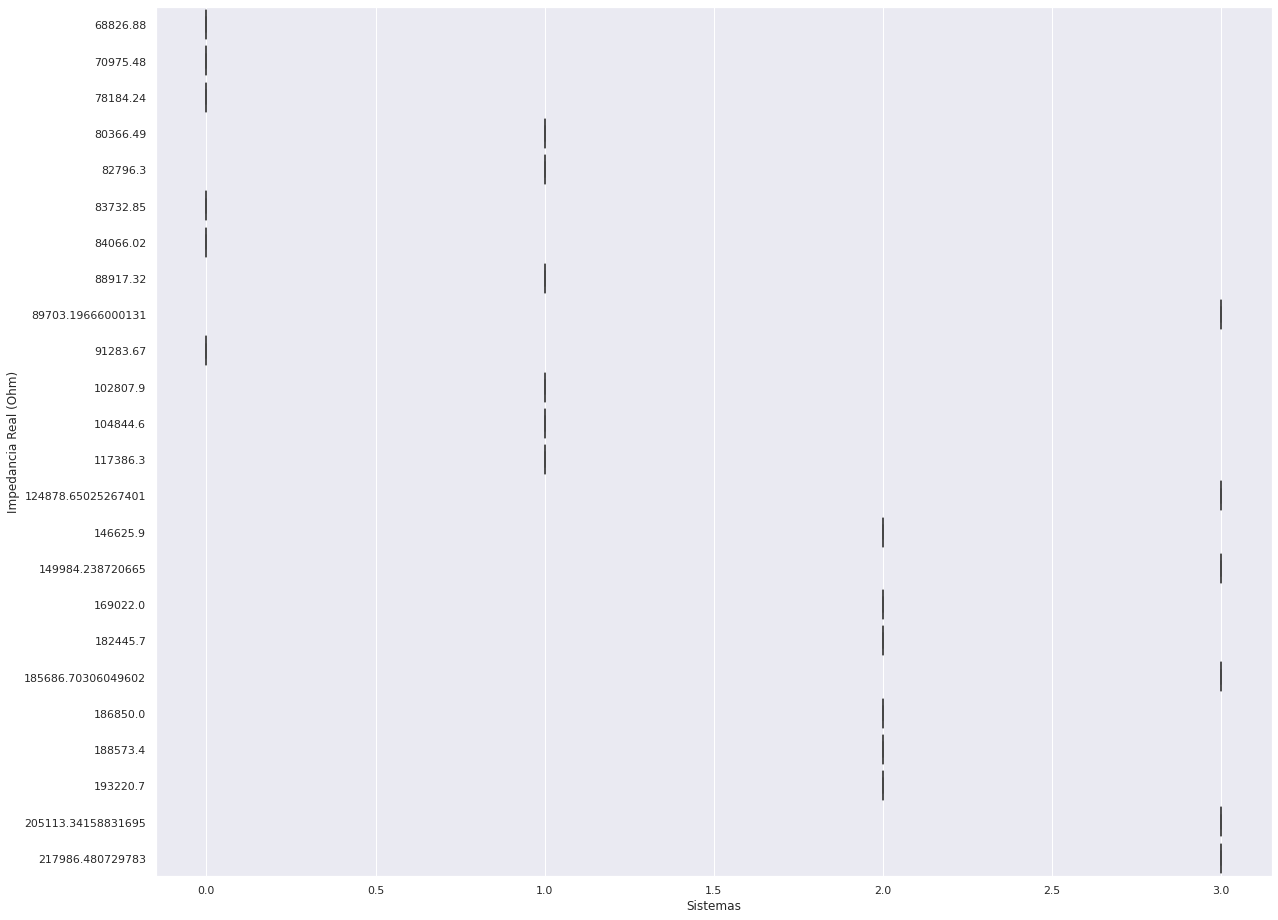

In [84]:
# Impedância Real _ Boxplot
#Z1['NumSystem'] = Z1['System'].map({'SF':0, 'SF_p24-3':1, 'SFeBA42':2, 'SF_BA42':3}) #incluir coluna para conseguir fazer boxplot
sns.set(rc={'figure.figsize':(20,16)})
ax = sns.boxplot(x='NumSystem', y=1, data=Z1, orient='h')
ax.set_xlabel('Sistemas')
ax.set_ylabel('Impedancia Real (Ohm)')


#### 4.3.2.2 Impedância Imaginária ($Z"$)

In [43]:
# Informações estatísticas básicas da Impedância Imaginaria dos sistemas

Z2.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,-310137.516667,10745.266995,-3.250248e+05,-3.165043e+05,-310921.250000,-301649.800000,-297033.100000
SF_BA42,6.0,-893633.055900,175401.863451,-1.117548e+06,-1.027534e+06,-874487.969216,-775324.614067,-674453.921686
SF_p24-3,6.0,-384921.283333,9285.017317,-3.969651e+05,-3.922418e+05,-382469.000000,-379806.425000,-373206.300000
SFeBA42,6.0,-606808.833333,36214.094430,-6.515235e+05,-6.287189e+05,-612761.200000,-586780.300000,-551648.900000


#### 4.3.2.3 Magnitude da Impedância ($Z$)

In [44]:
# Informações estatísticas básicas da Magnitude da Impedância dos sistemas

Z.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,320270.300000,10479.339266,308609.600000,312771.025000,319769.950000,3.240181e+05,3.376001e+05
SF_BA42,6.0,908437.434504,181087.613416,680393.089301,786400.383633,890448.365392,1.046867e+06,1.138610e+06
SF_p24-3,6.0,396946.550000,10769.013260,382280.200000,391519.925000,394670.650000,4.058123e+05,4.100619e+05
SFeBA42,6.0,632364.816667,39264.674826,570802.600000,611585.175000,639979.150000,6.572769e+05,6.782646e+05
